# Audio Preprocessing

**Terminologies Ref**  
https://towardsdatascience.com/all-you-need-to-know-to-start-speech-processing-with-deep-learning-102c916edf62

In [52]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [4]:
file = '../assets/sample/blues.00000.wav'
signal, sr = librosa.load(file, sr=22050)

**NOTE**  
Total samples = sr * T= 22050*30 = 661500  
where, sr: sampling rate & T: duration of the audio

### Raw Audio Signal - Time Domain Waveform

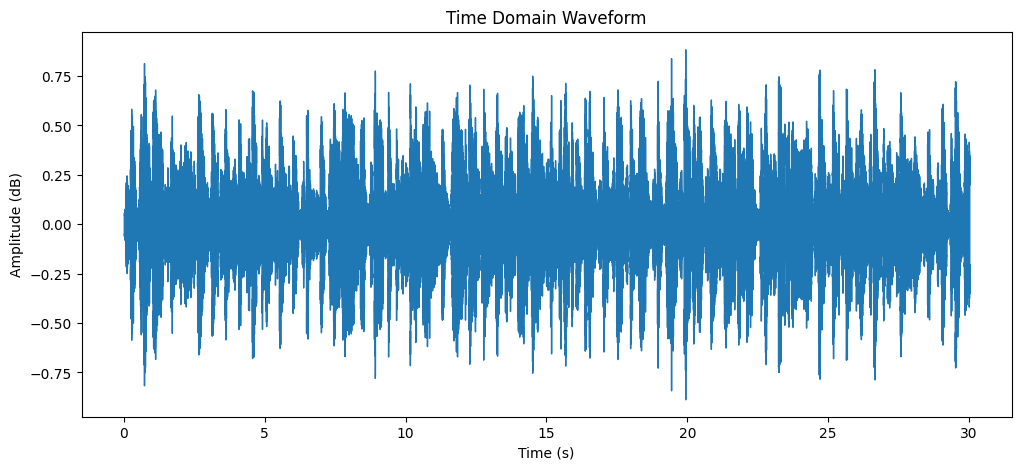

In [50]:
plt.figure(figsize=(12, 5))

librosa.display.waveshow(signal, sr=sr)
plt.title('Time Domain Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (dB)')

plt.show()

### Fast Fourier Transform - Periodogram

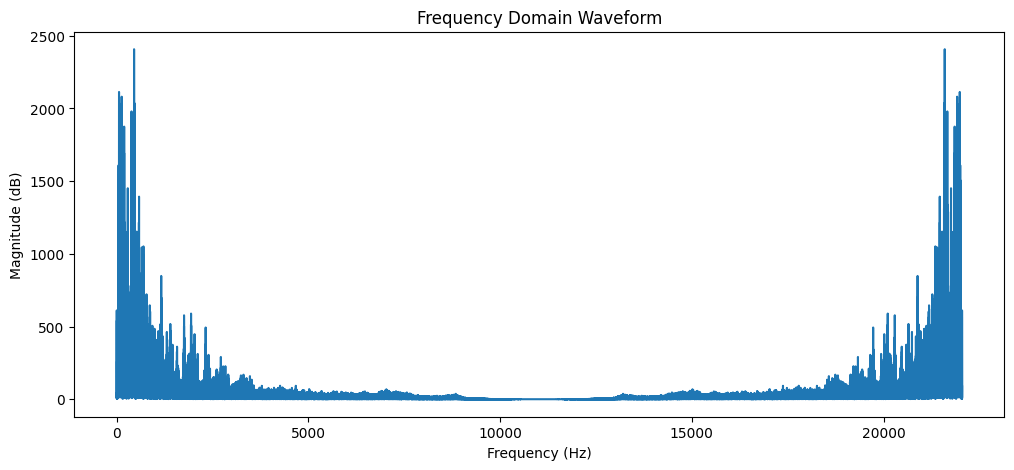

In [49]:
plt.figure(figsize=(12, 5))

fft = np.fft.fft(signal) # complex value
magnitude = np.abs(fft) # get only real value
frequency = np.linspace(0, sr, len(magnitude))

plt.plot(frequency, magnitude)
plt.title('Frequency Domain Waveform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()


**NOTE**  
Here the signal is symmetrical, hence also the reason why we use Nyquist frequency.

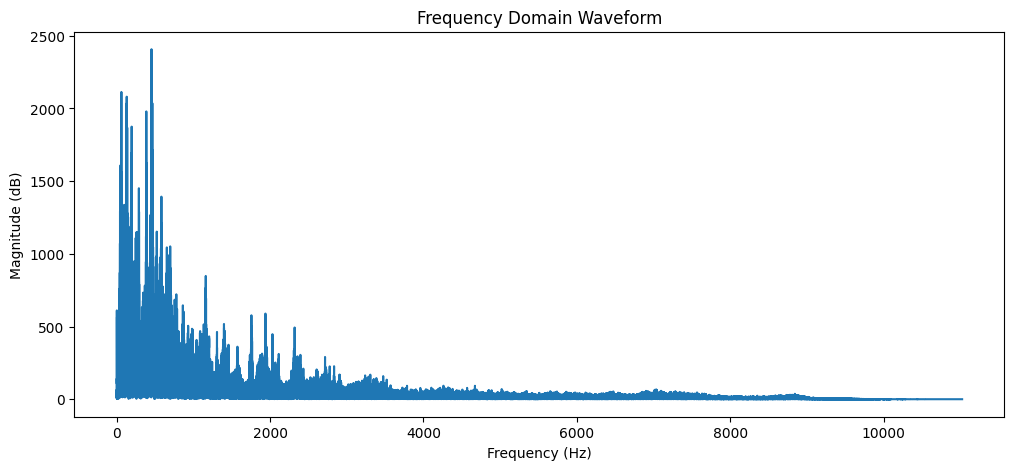

In [51]:
# Plotting Nyquist Frequency

plt.figure(figsize=(12, 5))

half_mag = magnitude[ : len(magnitude) // 2] # halved magnitude
nyquist_freq = frequency[ : len(frequency) // 2]
plt.plot(nyquist_freq, half_mag)

plt.title('Frequency Domain Waveform')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.show()

### Short Time Fourier Transform - Spectrogram

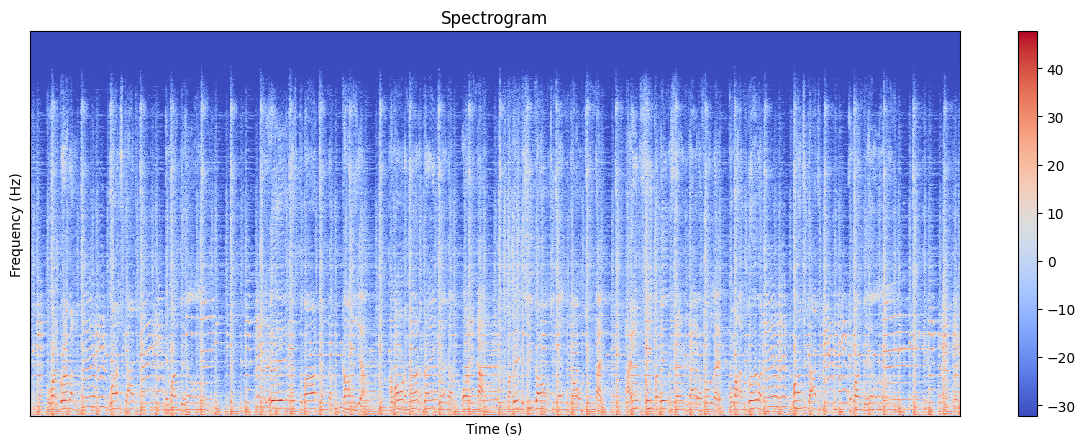

In [47]:
plt.figure(figsize=(15, 5))

n_fft = 2046 # no of samples per fft : 2^n
hop_length = 512 # length of the non-intersecting portion of window length

stft = librosa.core.stft(signal, hop_length=hop_length, n_fft=n_fft)
spectrogram = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(spectrogram)
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length)

plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar()
plt.show()

### Mel-Frequency Cepstral Coefficients (MFCCs)

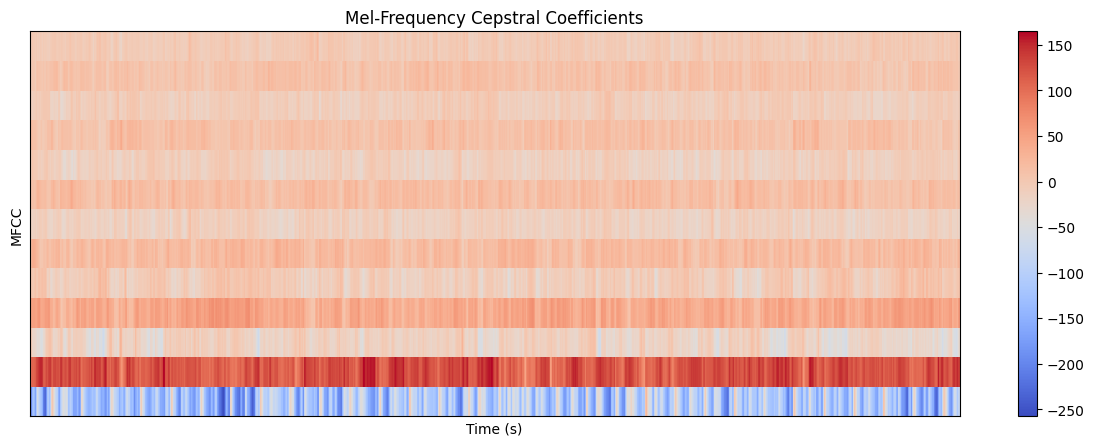

In [48]:
plt.figure(figsize=(15, 5))

mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13, n_fft=n_fft, hop_length=hop_length) # compressed feat.
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length)

plt.title('Mel-Frequency Cepstral Coefficients')
plt.xlabel('Time (s)')
plt.ylabel('MFCC')
plt.colorbar()
plt.show()